In [1]:
include("../src/Julia.jl")

parseCPPData (generic function with 1 method)

In [2]:
prec = ["default", "64", "128", "256", "512", "1024"];

In [3]:
jul = []
for p in 1:6
    push!(jul, parseData("../../graphs/pathDisjoint_30_exp20/_log_julia_tree1_" * prec[p] * ".txt"))
end

In [4]:
mat = []
for p in 1:6
    if p == 1
        push!(mat, parseMatlabData("../../graphs/pathDisjoint_30_exp20/_log_matlab_default.txt"))
        continue
    end
    push!(mat, parseMatlabData("../../graphs/pathDisjoint_30_exp20/_log_matlab_tree0_" * prec[p] * "precision_100iters.txt"))
end

In [27]:
#2 norm plot
dataj2 = [Array{Float64,1}(0) for i in 1:6]

for i in 1:20
    for p in 1:6
        push!(dataj2[p], jul[p][i][1])
    end
end

In [12]:
#2 norm plot
datam2 = [Array{Float64,1}(0) for i in 1:6]

for i in 1:10
    for p in 1:6
        push!(datam2[p], mat[p][i][1])
    end
end

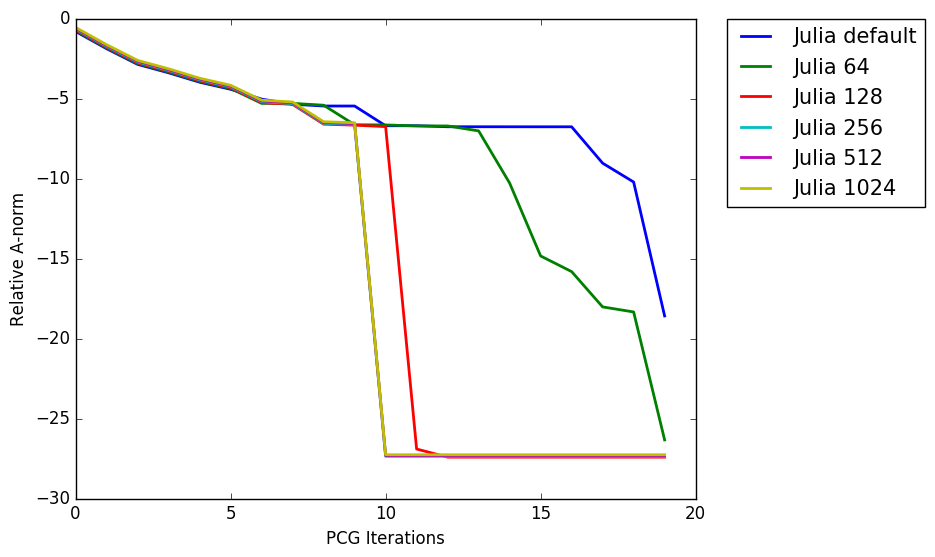

PyObject <matplotlib.text.Text object at 0x328a8c3d0>

In [29]:
for p in 1:6
    plot(log(dataj2[p])+0.05*p, label="Julia " * prec[p], linewidth=2)
end

# for p in 1:6
#     plot(log(datam2[p])+0.1, color="$(p/10+0.2)", label="Matlab " * prec[p], linewidth=2)
# end

legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=15, borderaxespad=0.)
ylabel("Relative A-norm")
xlabel("PCG Iterations")